In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


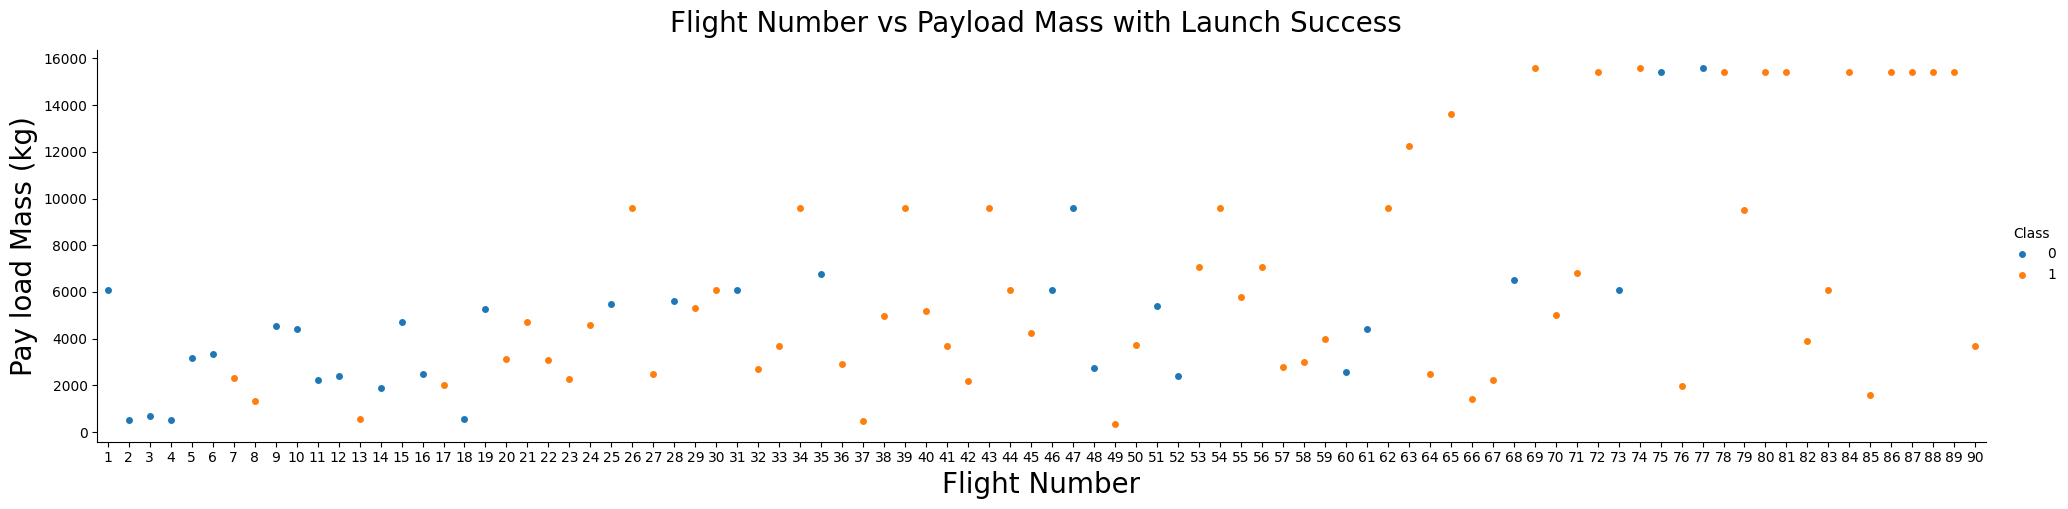

In [3]:
# Plot FlightNumber vs PayloadMass with Class Success

g = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=4)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
g.fig.suptitle("Flight Number vs Payload Mass with Launch Success", fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Title ko overlap se bachane ke liye
plt.show()


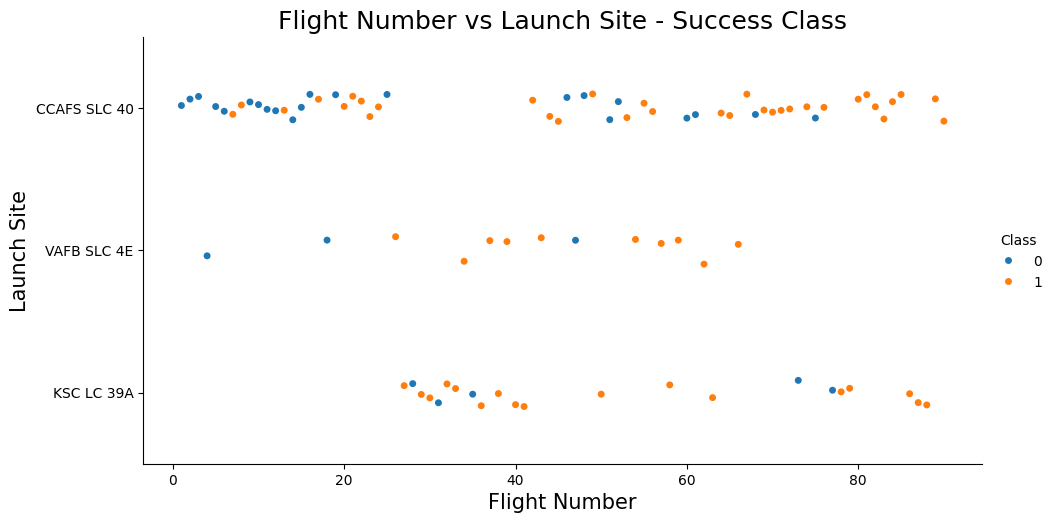

In [4]:
# Flight Number vs Launch Site

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site - Success Class", fontsize=18)
plt.show()


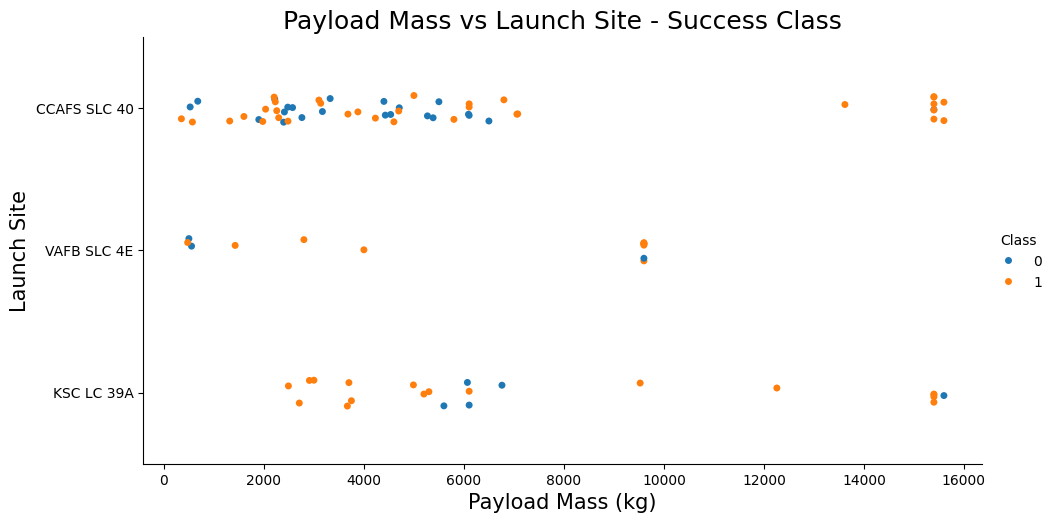

In [5]:
# Payload Mass vs Launch Site

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site - Success Class", fontsize=18)
plt.show()

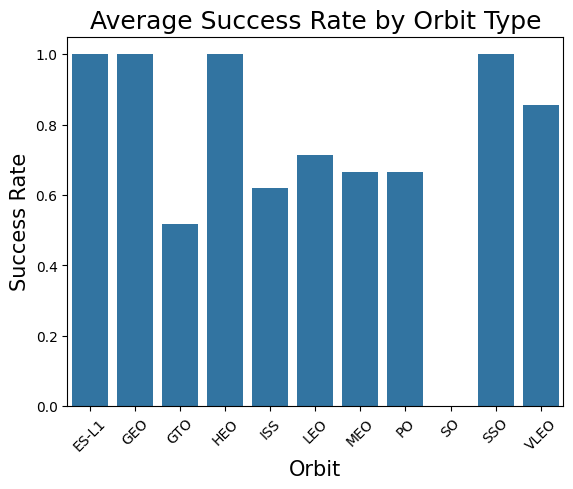

In [6]:
# Success Rate by Orbit Type

orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(x='Orbit', y='Class', data=orbit_success)
plt.xticks(rotation=45)
plt.xlabel("Orbit", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Average Success Rate by Orbit Type", fontsize=18)
plt.show()


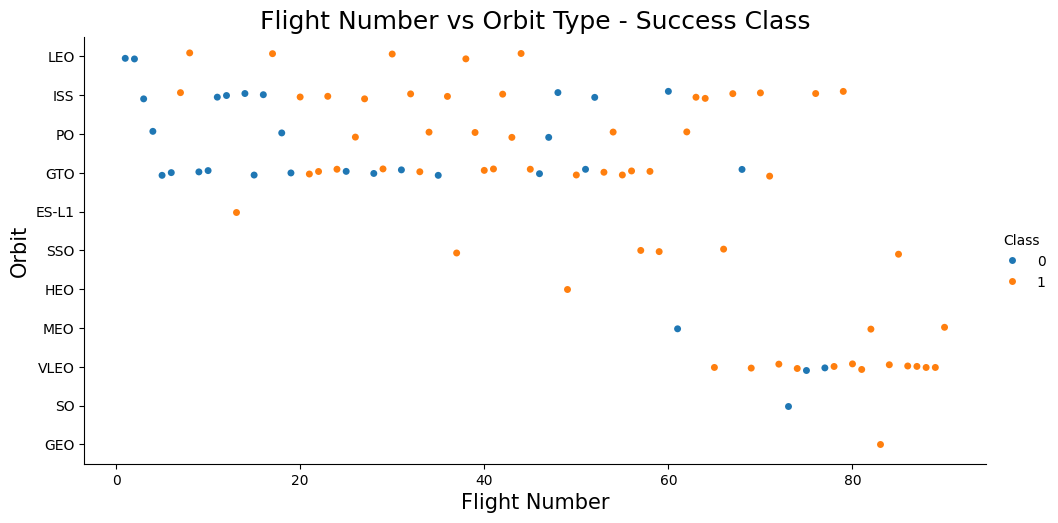

In [7]:
# Flight Number vs Orbit

sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Flight Number vs Orbit Type - Success Class", fontsize=18)
plt.show()



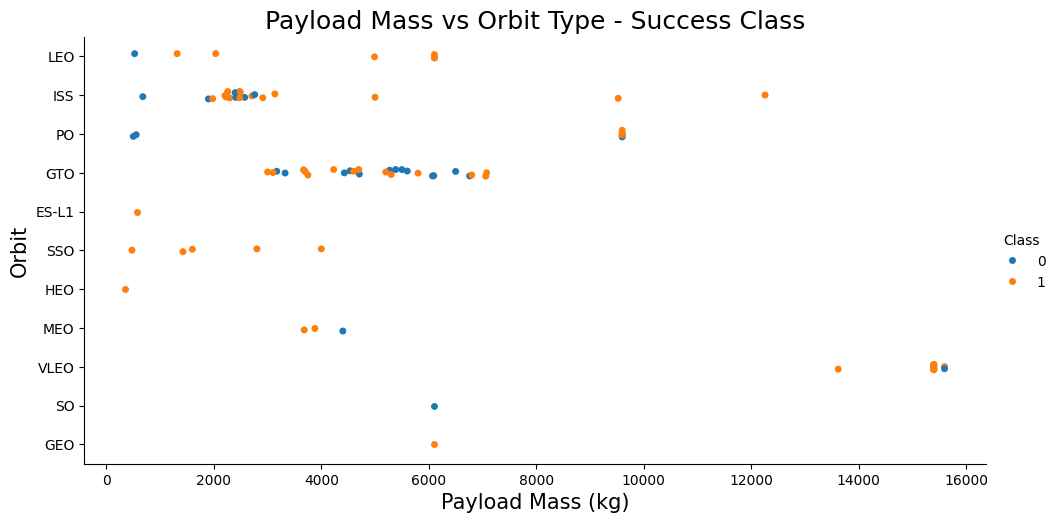

In [8]:
# Payload Mass vs Orbit

sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Payload Mass vs Orbit Type - Success Class", fontsize=18)
plt.show()


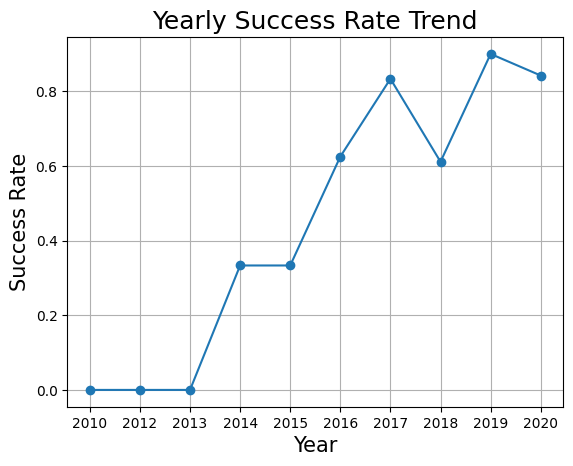

In [9]:
# Yearly Launch Success Trend

year = []
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df["Year"] = Extract_year(df["Date"])
success_by_year = df.groupby("Year")["Class"].mean().reset_index()

plt.plot(success_by_year["Year"], success_by_year["Class"], marker='o')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Yearly Success Rate Trend", fontsize=18)
plt.grid(True)
plt.show()


In [10]:
# Features Engineering 

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [11]:
# Create dummy variables to categorical columns

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Convert to float64

features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes.head()


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

In [13]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)